In [119]:
import pandas as pd
import numpy as np
from collections import Counter
from googletrans import Translator, constants
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import ggplot, aes, geom_count ,geom_violin ,geom_tile,scale_fill_gradient2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import difflib

# Import data

In [120]:
kdrama_df = pd.read_csv('kdrama.csv')

In [121]:
kdrama_df.head(10)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5
5,Reply 1988,"Nov 6, 2015 - Jan 16, 2016",2015,tvN,"Friday, Saturday",20,1 hr. 40 min.,15+ - Teens 15 or older,9.1,"Five childhood friends, who all live in the sa...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...","Shin Won Ho, Yoo Hak Chan",Lee Woo Jung,"Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...",CJ ENM,#6
6,Weak Hero Class 1,"Nov 18, 2022",2022,Wavve,Friday,8,40 min.,18+ Restricted (violence & profanity),9.1,Yeon Shi Eun is a model student who ranks at t...,"Action, Youth, Drama\r","Bromance, Smart Male Lead, Violence, School Bu...",You Su Min,Jun Hee Han,"Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...",PlayList Global,#7
7,Prison Playbook,"Nov 22, 2017 - Jan 18, 2018",2017,"Netflix, tvN","Wednesday, Thursday",16,1 hr. 32 min.,15+ - Teens 15 or older,9.1,"Kim Je Hyuk, a famous baseball player, is arre...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",Shin Won Ho,"Jung Bo Hoon, Lee Woo Jung","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...",tvN,#8
8,Alchemy of Souls,"Jun 18, 2022 - Aug 28, 2022",2022,"Netflix, tvN","Saturday, Sunday",20,1 hr. 20 min.,15+ - Teens 15 or older,9.0,Set in a fictional country called Daeho that d...,"Action, Historical, Romance, Fantasy","Magical Power, Supernatural, Transmigration, S...",Park Joon Hwa,"Hong Jung Eun, Hong Mi Ran","Lee Jae Wook, Jung So Min, Hwang Hyun Min, Shi...","Studio Dragon, High Quality",#9
9,Extraordinary Attorney Woo,"Jun 29, 2022 - Aug 18, 2022",2022,"ENA, Netflix","Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.0,"Diagnosed with autism spectrum disorder, 27-ye...","Law, Romance, Life, Drama","Autistic Female Lead, Autism, Attorney Female...",Yoo In Shik,Moon Ji Won,"Park Eun Bin, Kang Tae Oh, Kang Ki Young, Jeon...","AStory, KT Studio Genie, Nangman Crew",#10


# Explore and process data

In [122]:
# Cleaning data
kdrama_df['Rank'] = kdrama_df['Rank'].str.replace('#', '').astype(int)

In [123]:
kdrama_df.isnull().sum().sort_values(ascending=False)

Content Rating          5
Production companies    2
Screenwriter            1
Director                1
Rank                    0
Number of Episodes      0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Rating                  0
Duration                0
Synopsis                0
Genre                   0
Tags                    0
Cast                    0
Name                    0
dtype: int64

In [124]:
kdrama_df['Original Network list'] = kdrama_df.apply(lambda x: x['Original Network'].split(','), axis=1)

In [125]:
# selecting only the relevant columns
selected_feature = ['Name', 'Original Network', 'Synopsis', 'Genre', 'Tags', 'Director', 'Cast']
print(selected_feature)

['Name', 'Original Network', 'Synopsis', 'Genre', 'Tags', 'Director', 'Cast']


In [126]:
# replacing the null values with empty string
for feature in selected_feature:
    kdrama_df[feature] = kdrama_df[feature].fillna('')

In [127]:
combined_features = kdrama_df['Name'] + ' ' + kdrama_df['Original Network'] + ' ' + kdrama_df['Synopsis'] + ' ' + kdrama_df['Genre'] + ' ' + kdrama_df['Tags'] + ' ' + kdrama_df['Director'] + ' ' + kdrama_df['Cast']


In [128]:
print(combined_features[0])

Move to Heaven Netflix Geu Roo is a young autistic man. He works for his father’s business “Move To Heaven.” Their job is to arrange items left by deceased people. One day, Geu Roo's own father dies. Geu Roo is left alone, but his uncle Sang Koo suddenly appears in front of him. Sang Koo is a cold man. He was a martial artist who fought in underground matches. He went to prison because of what happened at his fight. Sang Koo now becomes Geu Roo’s guardian. They run “Move To Heaven” together. Life,  Drama,  Family  Autism, Uncle-Nephew Relationship, Death, Savant Syndrome, Mourning, Tearjerker, Father-Son Relationship, Life Lesson, Ex-convict, Cleaning And Organizing Kim Sung Ho Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Jung Suk Yong, Jung Young Joo, Lee Moon Shik


# Create Model

In [129]:
# converting text data to feature vectors
vectorizer = TfidfVectorizer()

In [130]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [131]:
# getting the similarity scores
similarity = cosine_similarity(feature_vectors)


In [132]:
print(similarity.shape)

(250, 250)


In [137]:
kdrame_name = input("Enter the name of the movie you want to search: ")

Enter the name of the movie you want to search: Memory


In [138]:
# creating list all the movie names
list_all_kdrama = kdrama_df['Name'].tolist()

In [139]:
# finding close matches for kdrama
find_close_matches = difflib.get_close_matches(kdrame_name, list_all_kdrama)
print(find_close_matches)

['Memory', 'Memorist']


In [140]:
close_matches = find_close_matches[0]
print(close_matches)

Memory


In [141]:
# finding the index of the movie
index_of_kdrama = kdrama_df[kdrama_df['Name'] == close_matches]['Rank'].values[0]
print(index_of_kdrama)

248


In [142]:
# getting a list similar movies
similarity_score = list(enumerate(similarity[index_of_kdrama]))
print(similarity_score[0:10])

[(0, 0.06088331456439936), (1, 0.1269551868970665), (2, 0.09726172886138762), (3, 0.06870788292192824), (4, 0.09886744421710858), (5, 0.08436141867400179), (6, 0.07365987567312061), (7, 0.07088953793809931), (8, 0.1030279257914197), (9, 0.07443532036534)]


In [143]:
len(similarity_score)

250

In [144]:
sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)
print(sorted_similar_movies[0:10])

[(248, 1.0000000000000002), (217, 0.18254461032781044), (98, 0.17733711756123893), (148, 0.17319857782822612), (204, 0.15493966979457038), (226, 0.14635047143674937), (211, 0.1445960441951953), (113, 0.14417880161501198), (112, 0.14341784840572494), (62, 0.1433990497650344)]


In [145]:
# printing the name of similarity movies based on index
print("KDrama suggested for you : \n")

i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = kdrama_df[kdrama_df['Rank'] == index]['Name'].values
    if len(title_from_index) > 0:
        title_from_index = title_from_index[0]
        if (i<=20):
            print(i, ".", title_from_index)
            i += 1
    else:
        continue

KDrama suggested for you : 

1 . Memory
2 . Hyena
3 . 365
4 . Search: WWW
5 . Vampire Prosecutor 2
6 . WATCHER
7 . Are You Human Too?
8 . Hi Bye, Mama!
9 . Doctor John
10 . My Name
11 . Train
12 . Tunnel
13 . Snowdrop
14 . Suspicious Partner
15 . Our Beloved Summer
16 . True Beauty
17 . Birthcare Center
18 . Big Mouth
19 . I'm Not a Robot
20 . Little Women


# Movie Recomendation system

In [154]:
kdrame_name = input("Enter the name of the movie you want to search: ")

list_all_kdrama = kdrama_df['Name'].tolist()

find_close_matches = difflib.get_close_matches(kdrame_name, list_all_kdrama)

close_matches = find_close_matches[0]

index_of_kdrama = kdrama_df[kdrama_df['Name'] == close_matches]['Rank'].values[0]

similarity_score = list(enumerate(similarity[index_of_kdrama]))

sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

print("KDrama suggested for you : \n")

i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    similarity_score_value = movie[1]
    title_from_index = kdrama_df[kdrama_df['Rank'] == index]['Name'].values
    if len(title_from_index) > 0:
        title_from_index = title_from_index[0]
        if (i<=20):
            print(i, ".", title_from_index, '\n    similarity score : ' ,similarity_score_value)
            print("------------------------------------")
            i += 1
    else:
        continue

Enter the name of the movie you want to search: Vincenzo
KDrama suggested for you : 

1 . Vincenzo 
    similarity score :  1.0000000000000002
------------------------------------
2 . The Guest 
    similarity score :  0.15220873199827592
------------------------------------
3 . Chicago Typewriter 
    similarity score :  0.13771058919683887
------------------------------------
4 . Five Enough 
    similarity score :  0.13023725490583019
------------------------------------
5 . Voice 
    similarity score :  0.1286642672149119
------------------------------------
6 . The Tale of Nokdu 
    similarity score :  0.1268821724400897
------------------------------------
7 . Big Mouth 
    similarity score :  0.11994384310879054
------------------------------------
8 . Mystic Pop-Up Bar 
    similarity score :  0.11773714517376718
------------------------------------
9 . He Is Psychometric 
    similarity score :  0.1166379553595359
------------------------------------
10 . Awaken 
    simila

# ---------------------------------------------------------------------------------------------------------------------------------END------------------------------------------------------------------------------------------------------------------------------------------------

# Appendix

In [11]:
#Remove spaces

ntw_ls = []

for i in range(len(kdrama_df)):
    word = []
    for j in kdrama_df['Original Network list'][i]:
        k = j.replace(' ','')
        word.append(k)
    
    ntw_ls.append(word)

In [12]:
kdrama_df['org_nw_ls'] = ntw_ls

In [13]:
org_nw_df = kdrama_df['org_nw_ls'].str.join(sep=',').str.get_dummies(sep=',')

In [14]:
kdrama_merge_df = pd.concat([kdrama_df, org_nw_df], axis=1)

In [15]:
kdrama_df['Aired On list'] = kdrama_df.apply(lambda x: x['Aired On'].split(','), axis=1)

ao_ls = []

for i in range(len(kdrama_df)):
    day = []
    for j in kdrama_df['Aired On list'][i]:
        k = j.replace(' ','')
        day.append(k)
    
    ao_ls.append(day)
    
kdrama_df['ao_ls'] = ao_ls
ao_df = kdrama_df['ao_ls'].str.join(sep=',').str.get_dummies(sep=',')
kdrama_merge_df2 = pd.concat([kdrama_merge_df, ao_df], axis=1)

In [16]:
ao_df.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,1
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1


In [17]:
kdrama_df['Genre list'] = kdrama_df.apply(lambda x: x['Genre'].split(','), axis=1)

gn_ls = []

for i in range(len(kdrama_df)):
    gn = []
    for j in kdrama_df['Genre list'][i]:
        k = j.replace(' ','')
        gn.append(k)
    
    gn_ls.append(gn)
    
kdrama_df['gn_ls'] = gn_ls
gn_df = kdrama_df['gn_ls'].str.join(sep=',').str.get_dummies(sep=',')
kdrama_merge_df2 = pd.concat([kdrama_merge_df2, gn_df], axis=1)

In [18]:
gn_df.head()

,Action,Adventure,Business,Comedy,Crime,Drama,Drama\r,Family,Fantasy,Food,...,Political,Psychological,Romance,School,Sci-Fi,Sitcom,Sports,Supernatural,Thriller,Youth
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
gn_df.describe()

,Action,Adventure,Business,Comedy,Crime,Drama,Drama\r,Family,Fantasy,Food,...,Political,Psychological,Romance,School,Sci-Fi,Sitcom,Sports,Supernatural,Thriller,Youth
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.180000,0.012000,0.036000,0.352000,0.104000,0.512000,0.004000,0.060000,0.136000,0.008000,...,0.072000,0.07600,0.544000,0.008000,0.044000,0.004000,0.024000,0.096000,0.344000,0.068000
std,0.384958,0.109104,0.186664,0.478552,0.305873,0.500859,0.063246,0.237963,0.343476,0.089263,...,0.259006,0.26553,0.499059,0.089263,0.205507,0.063246,0.153356,0.295182,0.475994,0.252251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
kdrama_df['Tags list'] = kdrama_df.apply(lambda x: x['Tags'].split(','), axis=1)

tag_ls = []

for i in range(len(kdrama_df)):
    tag = []
    for j in kdrama_df['Tags list'][i]:
        k = j.replace(' ','')
        tag.append(k)
    
    tag_ls.append(tag)
    
kdrama_df['tag_ls'] = tag_ls
tag_df = kdrama_df['tag_ls'].str.join(sep=',').str.get_dummies(sep=',')
kdrama_merge_df3 = pd.concat([kdrama_merge_df2, tag_df], axis=1)

In [21]:
tag_df.head()

,1980s,1990s,2000s,Ableism,Abuse,AbuseOfPower,AbusiveParents,Accident,Accountant,Actor,...,WorkplaceAbuse,WorkplacePolitics,WorkplaceRomance,WorkplaceSetting,Writer,WrongfullyAccused,Youth,YuanDynasty,ZombieApocalypse,Zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
kdrama_df['Cast list'] = kdrama_df.apply(lambda x: x['Cast'].split(','), axis=1)

cast_ls = []

for i in range(len(kdrama_df)):
    cast = []
    for j in kdrama_df['Cast list'][i]:
        k = j.replace(' ','')
        cast.append(k)
    
    cast_ls.append(cast)
    
kdrama_df['cast_ls'] = cast_ls
cast_df = kdrama_df['cast_ls'].str.join(sep=',').str.get_dummies(sep=',')
kdrama_merge_df4 = pd.concat([kdrama_merge_df3, cast_df], axis=1)

In [23]:
cast_df.head()

,AhnBoHyun,AhnDongGoo,AhnEunJin,AhnHyoSeop,AhnJaeHong,AhnJaeHyun,AhnJaeWook,AhnJiHo,AhnKilKang,AhnNaeSang,...,Yoshi,YounYuhJung,YunJiOn,butpretendingtobeJinYoungSeo.Onthefollowingday,butshelearnshehasagirlfriend.ShinHaRifeelssadanddecidestomeetherfriendJinYoungSeo,hisgrandfatherinformedhimofanupcomingblinddatethathesetupforhim.KangTaeMuisaworkaholicandheisannoyedthathisgrandfathersetsupblinddatesforhim.Hedecidestomarrythenextwomanwhomhemeetsatablinddate,sohewon'tbedisturbedfromhisworkanymore.ThatwomanisShinHaRi,whilehavingtheintentiontogetrejectedbyherdate.Whensheseesherblinddate,whoisadaughterofachaebolfamily.JinYoungSeothenasksShinHaRitotakeherplaceinablinddateandevenofferssomemoneyforhertime.ShinHaRiacceptsherfriend'soffer.ShegoesoutontheblinddateasJinYoungSeo,whoshehashadacrushonforalongtime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
kdrama_df['PD list'] = kdrama_df.apply(lambda x: str(x['Production companies']).split(','), axis=1)

pd_ls = []

for i in range(len(kdrama_df)):
    pd = []
    for j in kdrama_df['PD list'][i]:
        k = j.replace(' ','')
        pd.append(k)
    
    pd_ls.append(pd)
    
kdrama_df['pd_ls'] = pd_ls
pd_df = kdrama_df['pd_ls'].str.join(sep=',').str.get_dummies(sep=',')
#kdrama_merge_df5 = pd.concat([kdrama_merge_df4, pd_df], axis=1)

In [25]:
#kdrama_merge_df5 = pd.concat([kdrama_merge_df4, pd_df], axis=1)

In [26]:
pd_df.head()

,3ManaCreative,A&ENetworksKorea,A-ManProject,AHan.BokDreamProduction,ANDuEntertainment,AStory,AceFactory,ApolloPictures,ArcMedia,AteodCo.Ltd.,...,XanaduEntertainment,YGEntertainment,YongFilm,ZIUMContentCo.Ltd.,ZiumContent,doFRAME,iHQ,iWillMedia,nan,tvN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

In [27]:
gn_dfm = gn_df.melt()

In [28]:
count_gn = gn_dfm.groupby('variable')[['value']].sum().sort_values(by=['value'], ascending=False)
count_gn_10 = count_gn.nlargest(10, 'value')

In [29]:
ao_dfm = ao_df.melt()
count_ao = ao_dfm.groupby('variable')[['value']].sum().sort_values(by=['value'], ascending=False)
count_ao_10 = count_ao.nlargest(10, 'value')

In [30]:
nw_dfm = org_nw_df.melt()
count_nw = nw_dfm.groupby('variable')[['value']].sum().sort_values(by=['value'], ascending=False)
count_nw_10 = count_nw.nlargest(10, 'value')

In [31]:
tag_dfm = tag_df.melt()
count_tag = tag_dfm.groupby('variable')[['value']].sum().sort_values(by=['value'], ascending=False)
count_tag_10 = count_tag.nlargest(10, 'value')

In [32]:
cast_dfm = cast_df.melt()
count_cast = cast_dfm.groupby('variable')[['value']].sum().sort_values(by=['value'], ascending=False)
count_cast_10 = count_cast.nlargest(10, 'value')

/Users/pimawatmingkwan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
/Users/pimawatmingkwan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.


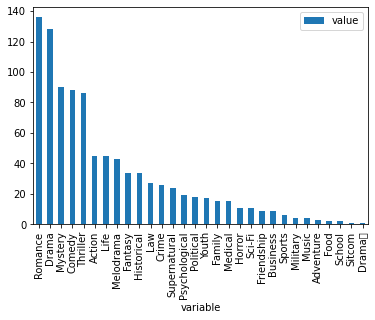

In [33]:
count_gn.plot.bar()
plt.show()

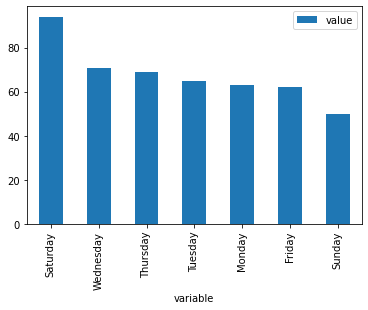

In [34]:
count_ao.plot.bar()
plt.show()

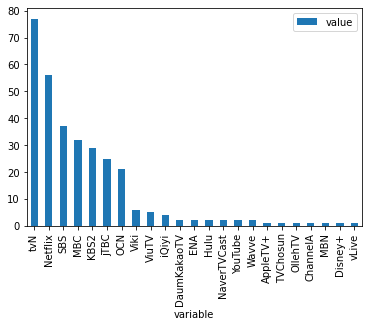

In [35]:
count_nw.plot.bar()
plt.show()

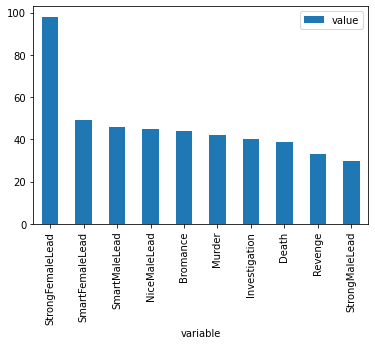

In [36]:
count_tag_10.plot.bar()
plt.show()

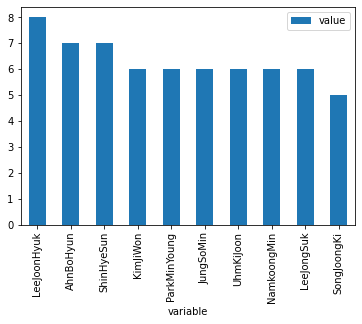

In [37]:
count_cast_10.plot.bar()
plt.show()

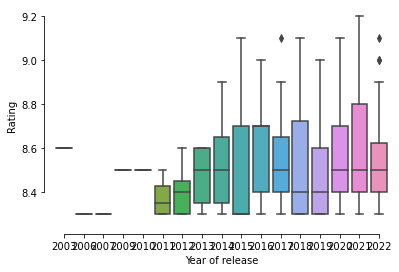

In [38]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Year of release", y="Rating",
            data=kdrama_merge_df4)
sns.despine(offset=10, trim=True)

[Text(0, 0.5, '')]

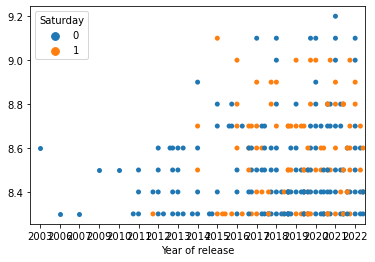

In [39]:
ax = sns.swarmplot(data=kdrama_merge_df4, x="Year of release", y="Rating", hue = "Saturday")
ax.set(ylabel="")

[Text(0, 0.5, '')]

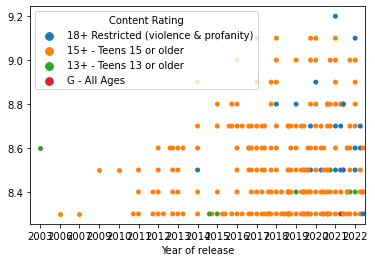

In [40]:
ax = sns.swarmplot(data=kdrama_merge_df4, x="Year of release", y="Rating", hue = "Content Rating")
ax.set(ylabel="")

In [41]:
ser = kdrama_merge_df4.groupby('Content Rating')['Rating'].mean().sort_values(ascending=False)
ser

Content Rating
18+ Restricted (violence & profanity)    8.670000
15+ - Teens 15 or older                  8.531481
13+ - Teens 13 or older                  8.400000
G - All Ages                             8.300000
Name: Rating, dtype: float64

Text(0.5, 1.0, '-')

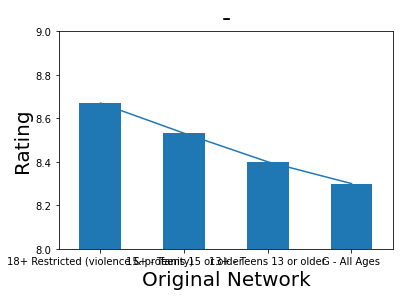

In [42]:
# Draw a plot bar chart
ser.plot.bar()
# Set the Bar Plot Labels and Title
ser.plot(x="Original Network", y="Rating")
plt.xlabel("Original Network",  size = 20)
plt.ylabel("Rating", size = 20)
plt.ylim(8,9)
plt.title("-", size = 25)

In [43]:
ser2 = kdrama_merge_df4.groupby('Year of release')['Rating'].mean().sort_values(ascending=False)
ser2

Year of release
2021    8.605128
2003    8.600000
2016    8.600000
2020    8.560000
2022    8.546875
2017    8.544444
2018    8.533333
2014    8.528571
2010    8.500000
2009    8.500000
2015    8.500000
2019    8.478378
2013    8.463636
2012    8.400000
2011    8.375000
2007    8.300000
2006    8.300000
Name: Rating, dtype: float64

Text(0.5, 1.0, '-')

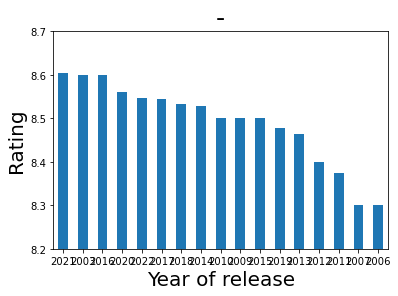

In [44]:
# Draw a plot bar chart
ser2.plot.bar()
# Set the Bar Plot Labels and Title
ser2.plot(x="Year of release", y="Rating")
plt.xlabel("Year of release",  size = 20)
plt.ylabel("Rating", size = 20)
plt.ylim(8.2,8.7)
plt.title("-", size = 25)